# Statement

Дан массив вещественных чисел A[1:n]. Предложите алгоритм, находящий для каждого элемента A индекс ближайшего справа элемента, большего его хотя бы в два раза. Если такого элемента нет, то должно возвращаться значение None. Ограничение по времени $O(n \log n)$, по дополнительной памяти — $O(n)$.

# Solution

In [3]:
def index_larger_elements_1(A, k=2):
    # list of ratios between the current element and all subsequent ones
    I = [None] * len(A)   # indexes
    R = [None] * len(A)   # ratios
    for i in range(len(A)):
        for j in range(i, len(A)):
            R[j] = A[j]/A[i]
            if R[j] >= k:
                I[i] = j
                break
    return(I)

In [4]:
def index_larger_elements_2(A, k=2):
    # list of ratios between the first element and all the others
    R = [None] * len(A)   # ratios
    I = [None] * len(A)   # indexes
    max_a = max(A)
    for i in range(0, len(A)):
        if i > 0:
            # if there is no solution for the previous element which is smaller,
            # there is no solution for the current one
            if A[i] >= A[i-1] and I[i-1] is None:
                I[i] = None
                continue
        if max_a/A[i] < k:
            continue
        for j in range(i, len(A)):
            R[j] = A[j]/A[i]
            if R[j] >= k:
                I[i] = j
                break
    return(I)

In [5]:
def index_larger_elements_3(A, k=2):
    I = [None] * len(A)   # indexes
    max_a = max(A)
    for i in range(0, len(A)):
        if i > 0:
            # if there is no solution for the previous element which is smaller,
            # there is no solution for the current one
            if A[i] >= A[i-1] and I[i-1] is None:
                I[i] = None
                continue
        if max_a/A[i] < k:
            continue
        for j in range(i, len(A)):
            if A[j]/A[i] >= k:
                I[i] = j
                break
    return(I)

In [6]:
def index_larger_elements_4(A, k=2):
    
    I = [None] * len(A)   # indexes
    n = len(A)
    
    for i in range(2, n+1):
        if i > 2 and A[n-i] >= A[n-i+1]:
            start_index = I[n-i+1]
        else:
            start_index = n-i+1
        if start_index is None:
            continue
        for j in range(start_index, n):
            if A[j]/A[n-i] >= k:
                I[n-i] = j
                break
    return(I)

In [7]:
# does not work so far

def index_larger_elements_5(A, k=2):
    
    I = [None] * len(A)   # indexes
    n = len(A)
    
    def search_start_index(a, i):
        
        if i == 1:
            return(1)

        if i > 2 and a >= A[n-i+1]:
            start_index = search_start_index(a, I[n-i+1])
        else:
            start_index = n-i+1
            
        if start_index is not None:    
            pass
        
        return(start_index)
    
    for i in range(2, n+1):
        start_index = search_start_index(A[n-i], i)
        if start_index is None:
            continue
        for j in range(start_index, n):
            if A[j]/A[n-i] >= k:
                I[n-i] = j
                break
    return(I)

In [8]:
#Обьявим функцию находящую ближайший справа вдвое больший элемент и вернем результат в виде массива индексов

def alex_fn_1(A):

    #Обьявим массив индексов для возврата результата (по умолчанию число не найдено)
    size = len(A)
    B = ['N'] * size
    #Возьмем самый правый элемент как наибольший в в последовательности
    max_value = A[size - 1]
    
    #ищем спарва налево 
    for i in range(size-2, -1, -1):
        #print('Line:',i, A[i])
        #Если текущий элемент больше максимального справа то искать бесполезно, пропускаем. Заодно выбираем его как максимальный для последовательности справа
        if (A[i] > max_value):
            max_value = A[i]
            continue

        #Если текущий элемент больше половыны максимального справа то искать бесполезно, пропускаем. 
        if (A[i] > max_value/2):
            continue 
        
        #Ищем первый наибольший справа
        for j in range(i+1, size):
            #print(A[i] > A[j])
            #Если текущий больше элемента справа и этот элемент имеет индекс, прыгаем вправо на этот элемент. Если нет такого - выходим. Искать бесполезно
            while (A[i] > A[j]):
                B[i] = B[j]
                if (B[j] == 'N'):
                      break
                j = int(B[j])

            #Если текущий элемент меньше равен половине выбраного справа - нашли!
            #print('A[i]*2 <= A[j]', A[i]*2 <= A[j], j, i)
            if (A[i]*2 <= A[j]):
                B[i] = j
                break

            #Если текущий элемент меньше выбраного справа, берем индекс его вдвоебольше элемента если есть такой. Иначе продлолжаем поиск двигаясь вправо
            #print('B[j]', j, B[j])
            if (B[j] != 'N'):
                B[i] = B[j]
            
    return B

# Evaluation

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [10]:
A = np.random.randint(1, 1000, 16)
print(A)
print(index_larger_elements_1(A))
print(index_larger_elements_3(A))
print(index_larger_elements_4(A))
print(alex_fn_1(A))

[722  63  48 955 290 102 751 864 962 523 924 234 834 898 832 250]
[None, 3, 3, None, 6, 6, None, None, None, None, None, 12, None, None, None, None]
[None, 3, 3, None, 6, 6, None, None, None, None, None, 12, None, None, None, None]
[None, 3, 3, None, 6, 6, None, None, None, None, None, 12, None, None, None, None]
['N', 3, 3, 'N', 6, 6, 'N', 'N', 'N', 'N', 'N', 12, 'N', 'N', 'N', 'N']


In [11]:
def eval_index_larger_elements(fn, n_list, n_iters=10):
    
    n_max = max(n_list)
    
    t = {}

    for n in n_list:
        t[n] = []
        for i in range(10):
            A = np.random.randint(1, 1000, n)
            start_time = time.time()
            I = fn(A)
            end_time = time.time()
            t[n].append(end_time-start_time)

    mean_times = [np.mean(times) for times in t.values()]
    
    return(mean_times)

In [16]:
n_max = 15000
n_list = np.arange(1, n_max, 100)

#mean_times_1 = eval_index_larger_elements(index_larger_elements_1, n_list)
mean_times_3 = eval_index_larger_elements(index_larger_elements_3, n_list)
#mean_times_4 = eval_index_larger_elements(index_larger_elements_4, n_list)
mean_times_11 = eval_index_larger_elements(alex_fn_1, n_list)

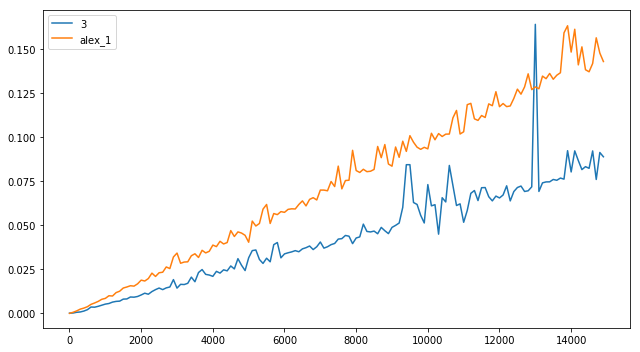

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

#ax.plot(n_list, mean_times_1)
ax.plot(n_list, mean_times_3)
#ax.plot(n_list, mean_times_4)
ax.plot(n_list, mean_times_11)
# ax.plot(n_list, (n_list*np.log(n_list))*(max(mean_times_4)/(n_max*np.log(n_max))))

#ax.legend(['Empirical', 'Theoretical'])
#ax.legend(['1', '3', '4', 'alex_1'])
ax.legend(['3', 'alex_1'])

fig.tight_layout()

# Appendix A: $n \log n$

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

n_list = np.arange(1, 1000000, 1000)
ax.plot(n_list, n_list)
ax.plot(n_list, np.log(n_list))
ax.plot(n_list, n_list*np.log(n_list))

ax.legend(['$n$', '$\log n$', '$n\log n$'])

fig.tight_layout()